In [3]:
data =  "/content/gdrive/My Drive/final_project_dataset_modified.pkl"

In [4]:
import pandas as pd
import pickle

In [5]:
dictionary = pd.read_pickle(data)

In [6]:
import numpy as np

In [7]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print ("error:", key , feature, "not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [8]:
features_list = ["bonus", "salary"]

In [9]:
dataset = featureFormat( dictionary, features_list, remove_any_zeroes=True)

In [10]:
def targetFeatureSplit( dataset ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in dataset:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [11]:
y, x = targetFeatureSplit( dataset )

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import KFold

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
kfold = KFold(n_splits=10, random_state=42)

In [17]:
from sklearn import linear_model

In [18]:
reg = linear_model.LinearRegression()

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
scoring = "r2"
results = cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())


R squared val:  -2.1843000286262457
Standard Deviation:  4.650438081785366


In [23]:
#Not using cross validate
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))


[1.94701552]
574358.863292031
0.03335734522882361


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


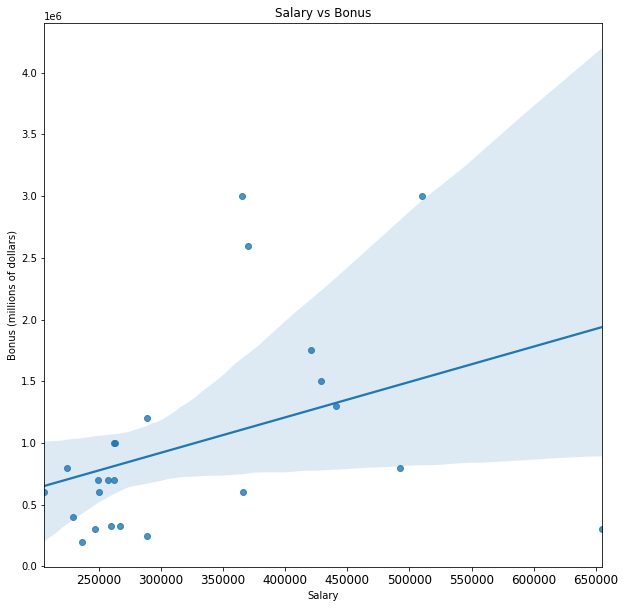

In [26]:
sns.regplot(X_test, y_test);

plt.title('Salary vs Bonus')
# Set x-axis label
plt.xlabel('Salary')
# Set y-axis label
plt.ylabel('Bonus (millions of dollars)')


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["xtick.labelsize"] = 12